### 1. Importing the relevant libraries

In [750]:
# CODE HERE
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Loading the raw data

#### Load the data from a .csv in the same folder

In [751]:
# CODE HERE
data = pd.read_csv('linear.csv')

#### Let's explore the top 5 rows of the df


In [752]:
# CODE HERE
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### Let's explore the datatype of each column


In [753]:
data.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

## Preprocessing

### 3. Exploring the descriptive statistics of the variables
-  Descriptive statistics are very useful for initial exploration of the variables
- By default, only descriptives for the numerical variables are shown
- To include the categorical ones, you should specify this with an argument

#### `numerical variables`

In [754]:
# CODE HERE
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


#### `categorical variables`

In [755]:
# CODE HERE
data.describe(include='object')

,Brand,Body,Engine Type,Registration,Model
count,4345,4345,4345,4345,4345
unique,7,6,4,2,312
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,936,1649,2019,3947,199


### Dealing with missing values

#### 4. Find the missing values from the data if any
- data.isnull() # shows a df with the information whether a data point is null. 
- Since True = the data point is missing, while False = the data point is not missing, we can sum them.
- This will give us the total number of missing values feature-wise.

#### `number of missing values in column`

In [756]:
# CODE HERE
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

#### `percentages of missing values in column`

In [757]:
# CODE HERE
(data.isnull().sum() / data.shape[0] ) * 100

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
Model           0.000000
dtype: float64

#### 5. Let's simply drop all missing values
Note: This is not always recommended, however, when we remove less than 5% of the data, it is okay

In [758]:
data.dropna(axis = 0,how='any',inplace=True)  # delete row which contain null values

In [759]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

#### 6. Let's check the descriptives without the missing values


In [760]:
# CODE HERE
data.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


#### `Both the columns that have missing values are of numerical datatype`

### Exploring the PDFs for Numerical Variables in the DataFrame

#### 7. A great step in the data exploration is to display the probability distribution function (PDF) of a variable
- The PDF will show us how that variable is distributed 
- This makes it very easy to spot anomalies, such as outliers
- The PDF is often the basis on which we decide whether we want to transform a feature

### Price

<AxesSubplot:xlabel='Price', ylabel='Density'>

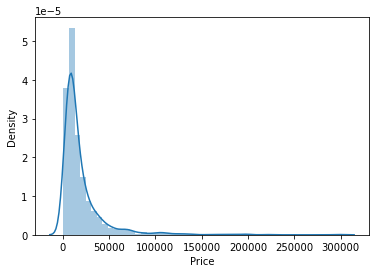

In [761]:
sns.distplot(data['Price'])

### Mileage

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

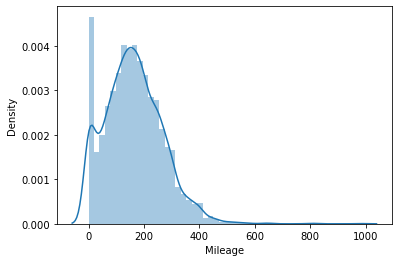

In [762]:
sns.distplot(data['Mileage'])

### EngineV

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

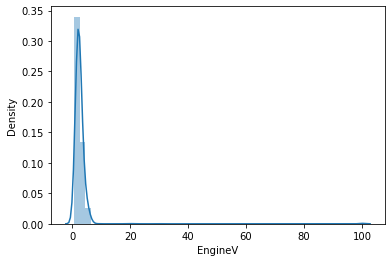

In [763]:
sns.distplot(data['EngineV'])

### Dealing with outliers
Hint: **Use IQR or Z Score**

### `I am using IQR technique below but will also try z technique at the end `




#### 8A. Identify the Outliers which are presented in `Price` Column

<AxesSubplot:xlabel='Price'>

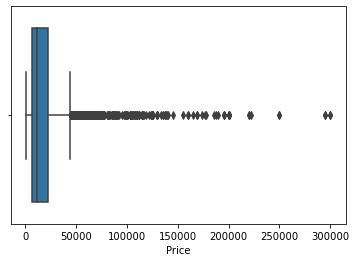

In [764]:
# CODE HERE
sns.boxplot(data['Price'])

In [765]:
q1=np.percentile(data['Price'],25)
q3=np.percentile(data['Price'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:-15352.5 and Upper Bound:44251.5


In [766]:
data[data['Price'] > upper_bound]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
37,BMW,67500.0,crossover,1,2.5,Diesel,yes,2016,X5
41,Mercedes-Benz,63000.0,crossover,86,5.5,Petrol,yes,2009,G 55 AMG
62,BMW,133000.0,crossover,7,4.4,Petrol,yes,2015,X5 M
64,Mercedes-Benz,50000.0,sedan,240,3.5,Petrol,yes,2006,S 350
...,...,...,...,...,...,...,...,...,...
4318,Mercedes-Benz,300000.0,other,37,5.0,Petrol,yes,2012,G 500
4322,Toyota,100000.0,crossover,0,4.5,Diesel,yes,2016,Land Cruiser 200
4327,Audi,80999.0,crossover,0,3.0,Diesel,yes,2016,Q7
4331,BMW,45000.0,crossover,80,3.0,Petrol,yes,2011,X6


#### 8B. Remove the Outliers which are presented in `Price` Column

In [767]:
# CODE HERE
data = data[data['Price'] <= upper_bound]   # remove outliers
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


#### 8C. Again Check the Distribution for `Price` Column and say something about distribution plot

<AxesSubplot:xlabel='Price', ylabel='Density'>

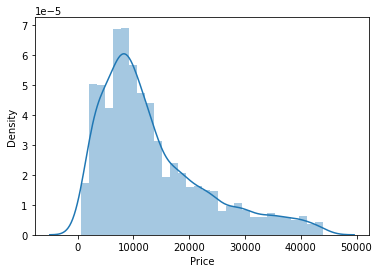

In [768]:
# CODE HERE
sns.distplot(data['Price'])

#### 9A. Same identify and remove the outliers in `Milage` column

<AxesSubplot:xlabel='Mileage'>

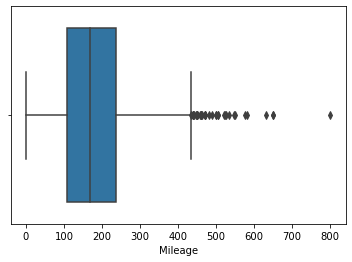

In [769]:
# CODE HERE
sns.boxplot(data['Mileage'])

In [770]:
q1=np.percentile(data['Mileage'],25)
q3=np.percentile(data['Mileage'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:-87.0 and Upper Bound:433.0


In [771]:
data[data['Mileage'] > upper_bound].head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
258,Volkswagen,2500.0,sedan,488,2.0,Petrol,yes,1991,Passat B3
284,Renault,4900.0,van,472,2.5,Diesel,yes,2000,Master
396,Mercedes-Benz,2650.0,sedan,470,2.0,Gas,yes,1985,190
899,Volkswagen,6500.0,other,547,1.9,Diesel,yes,1998,T4 (Transporter)


In [772]:
# CODE HERE
data = data[data['Mileage'] <= upper_bound]   # remove outliers
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV
10,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,Megane
11,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,19


#### 9B. Check the distribution after deleting the outliers in `milage` column and say something about distribution.

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

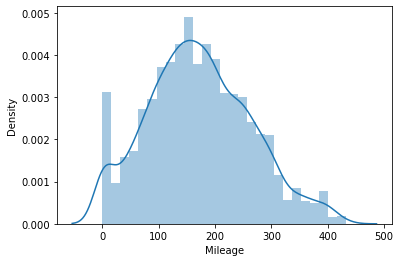

In [773]:
# CODE HERE
sns.distplot(data['Mileage'])

### `Now this variable is Normally Distributed`

#### 10A. Identify and remove the outliers from `EngineV` column



<AxesSubplot:xlabel='EngineV'>

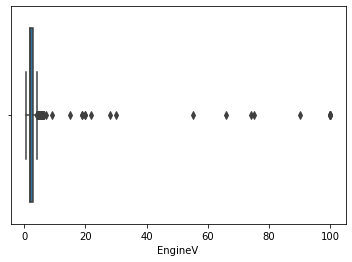

In [774]:
# CODE HERE
# CODE HERE
sns.boxplot(data['EngineV'])

In [775]:
# CODE HERE
q1=np.percentile(data['EngineV'],25)
q3=np.percentile(data['EngineV'],75)
IQR=q3-q1
good_value=1.5 * IQR
lower_bound=q1-good_value
upper_bound=q3+good_value
print(f'Lower Bound:{lower_bound} and Upper Bound:{upper_bound}')

Lower Bound:0.3000000000000005 and Upper Bound:4.299999999999999


In [776]:
data[data['EngineV'] > upper_bound].head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
14,Toyota,16000.0,crossover,250,4.7,Gas,yes,2001,Land Cruiser 100
33,BMW,28500.0,crossover,160,4.8,Gas,yes,2008,X5
48,Mercedes-Benz,29500.0,sedan,134,5.0,Petrol,yes,2008,S 500
53,Mercedes-Benz,13500.0,sedan,317,5.0,Petrol,yes,2001,S 500


In [777]:
# CODE HERE
data = data[data['EngineV'] <= upper_bound]   # remove outliers
data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV
10,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,Megane
11,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,19
12,Audi,9500.0,vagon,165,2.70,Gas,yes,2003,A6 Allroad


#### 10B. Ckeck the distribution plot after deleting the outliers and say something about it.

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

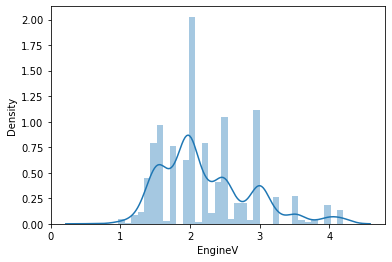

In [778]:
# CODE HERE
sns.distplot(data['EngineV'])

### `Now this variable is near to Normally distributed`

#### 10C. Perform Label & One-Hot Encoding For the Categorical Variable

### `Label Encoding`:

#### `Registration`

In [779]:
label_encoder = {"yes":1,"no":0}
data["Registration_encoded"] = data["Registration"].apply(lambda x: label_encoder[x] if x in label_encoder else 2)
data.sample(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Registration_encoded
1308,Audi,11900.0,sedan,195,2.4,Gas,yes,2005,A6,1
3294,Mercedes-Benz,3900.0,sedan,375,2.0,Petrol,yes,1990,190,1
1023,Mitsubishi,20500.0,crossover,109,3.2,Diesel,yes,2009,Pajero Wagon,1
913,BMW,3800.0,sedan,278,2.9,Diesel,no,2001,530,0
3112,Volkswagen,6900.0,sedan,256,1.8,Petrol,yes,2002,Passat B5,1
2508,Toyota,4650.0,hatch,170,1.0,Petrol,yes,2002,Yaris,1
4177,Renault,9200.0,hatch,12,1.2,Petrol,yes,2013,Sandero,1
3610,Audi,29000.0,vagon,213,3.0,Diesel,yes,2010,A6 Allroad,1
1540,Mercedes-Benz,3700.0,sedan,270,3.5,Petrol,no,2004,S 350,0
2704,Mercedes-Benz,15300.0,sedan,240,2.2,Diesel,yes,2006,E-Class,1


### `One hot Encoding`:

#### `Engine Type`

In [780]:
# Using get_dummies method in pandas
df_ohe = data.copy()
one_hot_1 = pd.get_dummies(df_ohe,prefix = 'Engine' ,columns=['Engine Type'],drop_first=False)
one_hot_1.insert(loc=2, column='Engine Type', value=data['Engine Type'].values)
one_hot_1

,Brand,Price,Engine Type,Body,Mileage,EngineV,Registration,Year,Model,Registration_encoded,Engine_Diesel,Engine_Gas,Engine_Other,Engine_Petrol
0,BMW,4200.0,Petrol,sedan,277,2.0,yes,1991,320,1,0,0,0,1
1,Mercedes-Benz,7900.0,Diesel,van,427,2.9,yes,1999,Sprinter 212,1,1,0,0,0
3,Audi,23000.0,Petrol,crossover,240,4.2,yes,2007,Q7,1,0,0,0,1
4,Toyota,18300.0,Petrol,crossover,120,2.0,yes,2011,Rav 4,1,0,0,0,1
7,Audi,14200.0,Diesel,vagon,200,2.7,yes,2006,A6,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,Diesel,van,163,2.5,yes,2008,T5 (Transporter),1,1,0,0,0
4339,Toyota,17900.0,Petrol,sedan,35,1.6,yes,2014,Corolla,1,0,0,0,1
4341,BMW,6500.0,Petrol,sedan,1,3.5,yes,1999,535,1,0,0,0,1
4342,BMW,8000.0,Petrol,sedan,194,2.0,yes,1985,520,1,0,0,0,1


#### `Body`

In [781]:
# Using get_dummies method in pandas
df_ohe = one_hot_1.copy()
one_hot_1 = pd.get_dummies(df_ohe,prefix = 'Body' ,columns=['Body'],drop_first=False)
one_hot_1.insert(loc=2, column='Body', value=data['Body'].values)
one_hot_1

,Brand,Price,Body,Engine Type,Mileage,EngineV,Registration,Year,Model,Registration_encoded,Engine_Diesel,Engine_Gas,Engine_Other,Engine_Petrol,Body_crossover,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van
0,BMW,4200.0,sedan,Petrol,277,2.0,yes,1991,320,1,0,0,0,1,0,0,0,1,0,0
1,Mercedes-Benz,7900.0,van,Diesel,427,2.9,yes,1999,Sprinter 212,1,1,0,0,0,0,0,0,0,0,1
3,Audi,23000.0,crossover,Petrol,240,4.2,yes,2007,Q7,1,0,0,0,1,1,0,0,0,0,0
4,Toyota,18300.0,crossover,Petrol,120,2.0,yes,2011,Rav 4,1,0,0,0,1,1,0,0,0,0,0
7,Audi,14200.0,vagon,Diesel,200,2.7,yes,2006,A6,1,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,Diesel,163,2.5,yes,2008,T5 (Transporter),1,1,0,0,0,0,0,0,0,0,1
4339,Toyota,17900.0,sedan,Petrol,35,1.6,yes,2014,Corolla,1,0,0,0,1,0,0,0,1,0,0
4341,BMW,6500.0,sedan,Petrol,1,3.5,yes,1999,535,1,0,0,0,1,0,0,0,1,0,0
4342,BMW,8000.0,sedan,Petrol,194,2.0,yes,1985,520,1,0,0,0,1,0,0,0,1,0,0


#### `dropping column because it has 247 types of values`

In [782]:
one_hot_1.dtypes

Brand                    object
Price                   float64
Body                     object
Engine Type              object
Mileage                   int64
EngineV                 float64
Registration             object
Year                      int64
Model                    object
Registration_encoded      int64
Engine_Diesel             uint8
Engine_Gas                uint8
Engine_Other              uint8
Engine_Petrol             uint8
Body_crossover            uint8
Body_hatch                uint8
Body_other                uint8
Body_sedan                uint8
Body_vagon                uint8
Body_van                  uint8
dtype: object

### Multicollinearity

#### 11A. Say about Multicollinearity and Find the Multicollinearity variables in the Dataset. 


<AxesSubplot:>

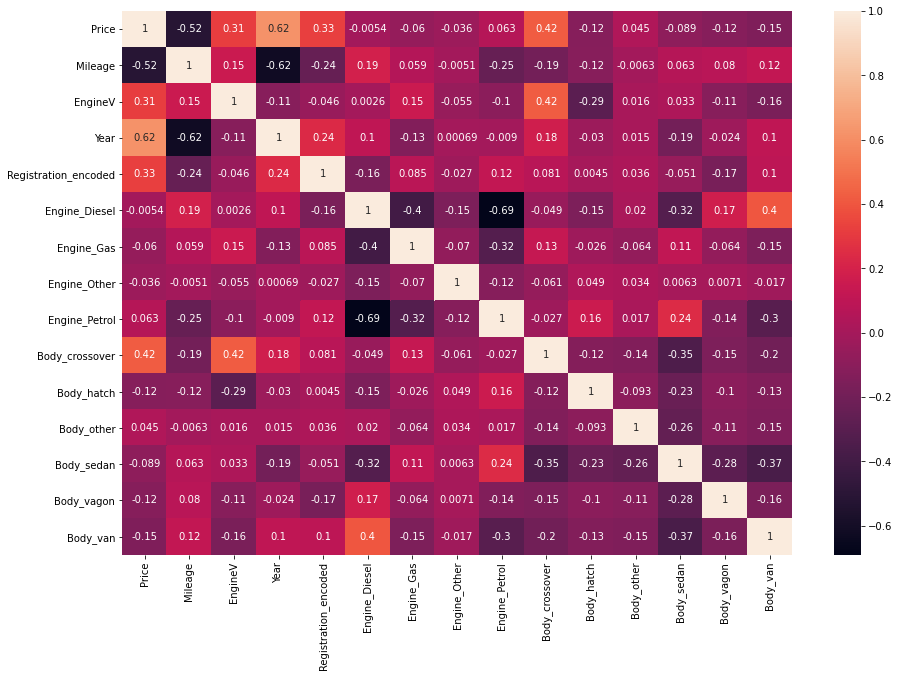

In [783]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(one_hot_1.corr(),annot=True)

#### 11B. Show the variables which are having Multicollinearity.
<br />
<br />
<br />


## `Categorical Variables ( chi square ) ------------------------------`

### Brand vs Body

In [784]:
two_way_frquency=pd.crosstab(data['Brand'],data['Body'])
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

2.3108125817537855e-269

#### `Brand and Body are related`

### Brand vs EngineType

In [785]:
two_way_frquency=pd.crosstab(data['Brand'],data['Engine Type'])

x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

4.428006391028606e-137

#### `Brand and Engine type are related`

### Brand vs Registration

In [786]:
two_way_frquency=pd.crosstab(data['Brand'],data['Registration'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

9.547047723979418e-42

#### `Brand and Registration are related`

### Body vs Engine Type

In [787]:
two_way_frquency=pd.crosstab(data['Body'],data['Engine Type'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

4.65930865491815e-192

#### `bodyand Engine Type are related`

### Body vs Registration

In [788]:
two_way_frquency=pd.crosstab(data['Body'],data['Registration'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

6.179157169957441e-30

#### `Body and Registration are related`

### Engine Type vs Registration

In [789]:
two_way_frquency=pd.crosstab(data['Engine Type'],data['Registration'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

3.366306488717531e-22

#### `Engine Type and registration are related`

### Brand vs Model

In [790]:
two_way_frquency=pd.crosstab(data['Brand'],data['Model'])
x2_value , p_value, df, expected_values = chi2_contingency(two_way_frquency)
p_value

0.0

#### `Brand and Model are related`

### `There is a lot of multicollinearity between columns as you can see below`

In [791]:
X_cat = one_hot_1[['Registration_encoded',
       'Engine_Diesel', 'Engine_Gas', 'Engine_Other', 'Engine_Petrol',
       'Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van']]

In [792]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   # vif
vif = pd.DataFrame()
vif['Features'] = X_cat.columns
vif['VIF'] = [variance_inflation_factor(X_cat.values, i) for i in range(X_cat.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Engine_Diesel,inf
2,Engine_Gas,inf
3,Engine_Other,inf
4,Engine_Petrol,inf
5,Body_crossover,inf
6,Body_hatch,inf
7,Body_other,inf
8,Body_sedan,inf
9,Body_vagon,inf
10,Body_van,inf


In [793]:
import statsmodels.api as sm
X_train_sm  = sm.add_constant(X_cat)
ols_model = sm.OLS(y,X_train_sm)
ols_model = ols_model.fit()
ols_model.pvalues

const                    6.340204e-12
Registration_encoded    1.056875e-100
Engine_Diesel            8.583565e-23
Engine_Gas               5.998705e-12
Engine_Other             1.131882e-01
Engine_Petrol            1.481261e-04
Body_crossover          1.213234e-173
Body_hatch               6.959231e-12
Body_other               1.213384e-03
Body_sedan               3.537193e-01
Body_vagon               8.546421e-06
Body_van                 3.177622e-33
dtype: float64

### `so I haveto investigate it I have to dip more, and treat it`

### I should remove the redundant columns to remove multi collinerity

In [794]:
X_cat = one_hot_1[['Registration_encoded',
       'Engine_Diesel', 'Engine_Gas', 'Engine_Other',
       'Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon']]

In [795]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   # vif
vif = pd.DataFrame()
vif['Features'] = X_cat.columns
vif['VIF'] = [variance_inflation_factor(X_cat.values, i) for i in range(X_cat.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Registration_encoded,4.69
7,Body_sedan,2.30
1,Engine_Diesel,1.98
4,Body_crossover,1.62
2,Engine_Gas,1.41
6,Body_other,1.34
8,Body_vagon,1.31
5,Body_hatch,1.27
3,Engine_Other,1.06


In [796]:
import statsmodels.api as sm
X_train_sm  = sm.add_constant(X_cat)
ols_model = sm.OLS(y,X_train_sm)
ols_model = ols_model.fit()
ols_model.pvalues

const                    2.460659e-01
Registration_encoded    1.056875e-100
Engine_Diesel            9.661941e-06
Engine_Gas               2.740794e-17
Engine_Other             9.656730e-01
Body_crossover          7.433562e-158
Body_hatch               5.477563e-02
Body_other               9.684861e-23
Body_sedan               1.819792e-23
Body_vagon               1.592131e-06
dtype: float64

### `Now these columns are not effected with multicollinearity --------------- Bam!!`
<br />
<br />
<br />


## `Numerical variables ---------------------------------`

In [797]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # to check multicollinearity


### function of vif
def cal_vif(X):
    vif=pd.DataFrame()
    vif['var']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

In [798]:
X_num = one_hot_1[[ 'Mileage', 'EngineV','Year']]

In [799]:
cal_vif(X_num)

,var,VIF
0,Mileage,4.543781
1,EngineV,12.955885
2,Year,14.386646


<AxesSubplot:>

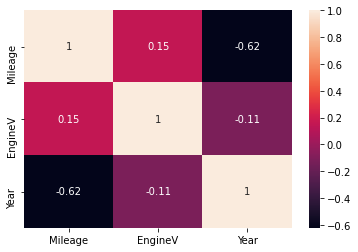

In [800]:
sns.heatmap(X_num.corr(),annot=True)

#### Numerical columns:
`Milage and year are multicollinear variables`

### Model fit

#### 12A. Perform The Model fit & Model output using OLS 

In [801]:
X = one_hot_1[[ 'Mileage', 'EngineV',
       'Year', 'Registration_encoded',
       'Engine_Diesel', 'Engine_Gas', 'Engine_Other', 'Engine_Petrol',
       'Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van']]
y = one_hot_1['Price']

In [802]:
import statsmodels.api as sm
X_train_sm  = sm.add_constant(X)
ols_model = sm.OLS(y,X_train_sm)
ols_model = ols_model.fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     508.2
Date:                Sun, 05 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:27:23   Log-Likelihood:                -34294.
No. Observations:                3419   AIC:                         6.861e+04
Df Residuals:                    3406   BIC:                         6.869e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.214e+05   2.82e+04    -32.719      0.000   -9.77e+05   -8.66e+05
Mileage                -19.2603      1.438    -13.393      0.000     -22.080     -16.441
EngineV               4513.8470    175.229     25.760      0.000    4170.282    4857.412
Year                   650.9190     19.825     32.834      0.000     612.049     689.789
Registration_encoded  5916.6919    333.121     17.761      0.000    5263.555    6569.829
Engine_Diesel         -2.29e+05   7073.936    -32.376      0.000   -2.43e+05   -2.15e+05
Engine_Gas            -2.32e+05   7021.261    -33.037      0.000   -2.46e+05   -2.18e+05
Engine_Other         -2.303e+05   7066.121    -32.592      0.000   -2.44e+05   -2.16e+05
Engine_Petrol        -2.301e+05   7024.464    -32.759      0.000   -2.44e+05   -2.16e+05
Body_crossover       -1.499e+05   4728.223    -31.708      0.000   -1.59e+05   -1.41e+05
Body_hatch           -1.543e+05   4663.258    -33.083      0.000   -1.63e+05   -1.45e+05
Body_other           -1.529e+05   4703.145    -32.507      0.000   -1.62e+05   -1.44e+05
Body_sedan            -1.53e+05   4683.858    -32.667      0.000   -1.62e+05   -1.44e+05
Body_vagon           -1.544e+05   4702.705    -32.830      0.000   -1.64e+05   -1.45e+05
Body_van             -1.569e+05   4723.554    -33.223      0.000   -1.66e+05   -1.48e+05
==============================================================================
Omnibus:                      733.876   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1941.764
Skew:                           1.145   Prob(JB):                         0.00
Kurtosis:                       5.896   Cond. No.                     2.18e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.93e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### `It is a Bad Model ---------- as it have a lot of multicollinearity and we have to treat it`
<br />
<br />
<br />


#### 12B. Explain the Model Evaluation metrics in OLS method.

**Note:** Give The Explanation about R-square, Adjusted.R-Square and Explain the P-Value in OLS Table

### `R Square`: 
- `R-squared (R2)`: Is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, `if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs`.
<br />

- `Here R-squared: 0.528 which means SSR/SST = 0.642 which means it is not a good fit for this model because R-square is very low`.
<br />

### ` Adjusted.R-Square`
- ` Adjusted.R-Square`: The Adjusted R-squared takes into account the number of independent variables used for predicting the target variable. In doing so, we can determine whether adding new variables to the model actually increases the model fit.
<br />

- `Here Adjusted.R-squared: 00.640`.
- Near to Same R Square and adjusted.R-Square means that the variables taken taken to fit line are actually not casusing any unnecessary damage as The adjusted R2 will penalize you for adding independent variables that do not fit the model.

<br />

###  `P-value`
- `P-value`: Same as in Hypothesis testing P-value less then 0.05 means we can reject our null hypothesis, or in other words these variables are not related and can be used to predict dependent variable

#### 13A. Feature Selection using with Forward Selection
<br />
<br />
<br />


## `Feature Selection ( Forward Selection )`

In [803]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X[['Mileage']])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print('-----------------------------')
print('-----------------------------')
print(f'parameters:\n{lr.params}')
print('-----------------------------')
print('-----------------------------')
print(f'p-values:\n{lr.pvalues}')

R-squared 0.2663678751333278
Adj-Rsquared 0.2661531744822109
-----------------------------
-----------------------------
parameters:
const      21695.580406
Mileage      -51.334413
dtype: float64
-----------------------------
-----------------------------
p-values:
const       0.000000e+00
Mileage    3.906071e-232
dtype: float64


In [804]:
X_train_sm = sm.add_constant(X[['Mileage','EngineV']])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print('-----------------------------')
print('-----------------------------')
print(f'parameters:\n{lr.params}')
print('-----------------------------')
print('-----------------------------')
print(f'p-values:\n{lr.pvalues}')

R-squared 0.42389302396998674
Adj-Rsquared 0.42355572480369275
-----------------------------
-----------------------------
parameters:
const      10155.043514
Mileage      -57.414863
EngineV     5659.834830
dtype: float64
-----------------------------
-----------------------------
p-values:
const      1.338114e-103
Mileage     0.000000e+00
EngineV    1.482852e-181
dtype: float64


In [805]:
X_train_sm = sm.add_constant(X[['Mileage','EngineV','Year']])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print('-----------------------------')
print('-----------------------------')
print(f'parameters:\n{lr.params}')
print('-----------------------------')
print('-----------------------------')
print(f'p-values:\n{lr.pvalues}')

R-squared 0.5754987980876582
Adj-Rsquared 0.5751258834154074
-----------------------------
-----------------------------
parameters:
const     -1.394272e+06
Mileage   -2.679401e+01
EngineV    5.767502e+03
Year       6.974522e+02
dtype: float64
-----------------------------
-----------------------------
p-values:
const      6.406187e-226
Mileage     3.134784e-75
EngineV    6.098716e-244
Year       9.309216e-229
dtype: float64


In [806]:
X_train_sm = sm.add_constant(X[['Mileage','EngineV','Year','Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',]])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print('-----------------------------')
print('-----------------------------')
print(f'parameters:\n{lr.params}')
print('-----------------------------')
print('-----------------------------')
print(f'p-values:\n{lr.pvalues}')

R-squared 0.6028325705362743
Adj-Rsquared 0.6020175098484273
-----------------------------
-----------------------------
parameters:
const            -1.413608e+06
Mileage          -2.116637e+01
EngineV           4.402598e+03
Year              7.070999e+02
Body_crossover    5.485581e+03
Body_hatch        9.114345e+02
Body_other        2.950067e+03
Body_sedan        2.166075e+03
dtype: float64
-----------------------------
-----------------------------
p-values:
const             1.593046e-227
Mileage            1.233636e-46
EngineV           8.013325e-118
Year              7.619855e-231
Body_crossover     4.351371e-49
Body_hatch         3.139152e-02
Body_other         7.485702e-15
Body_sedan         5.348919e-17
dtype: float64


In [807]:
X_train_sm = sm.add_constant(X[['Mileage','EngineV','Year','Body_crossover', 'Body_hatch',
                                'Body_other', 'Body_sedan','Body_vagon','Engine_Diesel', 'Engine_Gas', 'Engine_Other']])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print('-----------------------------')
print('-----------------------------')
print(f'parameters:\n{lr.params}')
print('-----------------------------')
print('-----------------------------')
print(f'p-values:\n{lr.pvalues}')

R-squared 0.6084388500533512
Adj-Rsquared 0.6071746373590708
-----------------------------
-----------------------------
parameters:
const            -1.394898e+06
Mileage          -2.125264e+01
EngineV           4.440002e+03
Year              6.974442e+02
Body_crossover    6.374947e+03
Body_hatch        1.690090e+03
Body_other        3.554754e+03
Body_sedan        3.006645e+03
Body_vagon        1.182157e+03
Engine_Diesel     3.088047e+02
Engine_Gas       -1.601185e+03
Engine_Other     -7.917937e+02
dtype: float64
-----------------------------
-----------------------------
p-values:
const             3.934872e-215
Mileage            2.079813e-44
EngineV           5.536118e-120
Year              5.597071e-218
Body_crossover     1.343978e-52
Body_hatch         3.148240e-04
Body_other         1.578627e-17
Body_sedan         9.915578e-20
Body_vagon         2.168740e-03
Engine_Diesel      2.354869e-01
Engine_Gas         2.337464e-07
Engine_Other       2.106573e-01
dtype: float64


In [808]:
X_train_sm = sm.add_constant(X[['Mileage','EngineV','Year','Body_crossover', 'Body_hatch',
                                'Body_other', 'Body_sedan','Body_vagon','Engine_Diesel',
                                'Engine_Gas', 'Engine_Other','Registration_encoded']])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print('-----------------------------')
print('-----------------------------')
print(f'parameters:\n{lr.params}')
print('-----------------------------')
print('-----------------------------')
print(f'p-values:\n{lr.pvalues}')

R-squared 0.641631342591315
Adj-Rsquared 0.6403687401576966
-----------------------------
-----------------------------
parameters:
const                  -1.308453e+06
Mileage                -1.926034e+01
EngineV                 4.513847e+03
Year                    6.509190e+02
Body_crossover          7.010485e+03
Body_hatch              2.656654e+03
Body_other              4.047991e+03
Body_sedan              3.925145e+03
Body_vagon              2.543941e+03
Engine_Diesel           1.087202e+03
Engine_Gas             -1.846043e+03
Engine_Other           -1.827100e+02
Registration_encoded    5.916692e+03
dtype: float64
-----------------------------
-----------------------------
p-values:
const                   3.274968e-205
Mileage                  6.674901e-40
EngineV                 7.618944e-134
Year                    1.155150e-205
Body_crossover           1.160979e-67
Body_hatch               4.452315e-09
Body_other               5.815175e-24
Body_sedan               4.032670e-3

<AxesSubplot:>

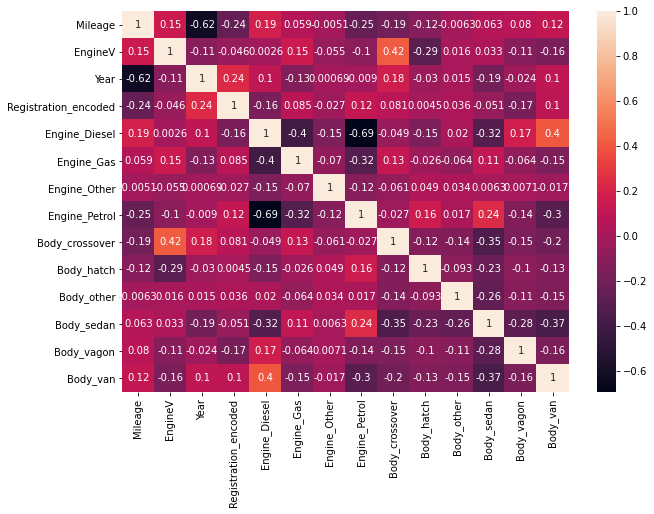

In [809]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(),annot=True)

In [810]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   # vif
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Engine_Diesel,inf
5,Engine_Gas,inf
6,Engine_Other,inf
7,Engine_Petrol,inf
8,Body_crossover,inf
9,Body_hatch,inf
10,Body_other,inf
11,Body_sedan,inf
12,Body_vagon,inf
13,Body_van,inf


### `Milage has multicollinearity in correlation matrix, and VIF of year is also high, drop year`m

In [811]:
X_train_sm = sm.add_constant(X[['Mileage','EngineV','Body_crossover', 'Body_hatch',
                                'Body_other', 'Body_sedan','Body_vagon','Engine_Diesel',
                                'Engine_Gas', 'Engine_Other','Registration_encoded']])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print(f'parameters:\n{lr.params}')

R-squared 0.5282022206284167
Adj-Rsquared 0.5266789521890015
parameters:
const                   1512.196251
Mileage                  -48.169570
EngineV                 4203.041178
Body_crossover          7095.297510
Body_hatch               549.640761
Body_other              3310.616490
Body_sedan              2725.684244
Body_vagon              1830.925514
Engine_Diesel           2714.802075
Engine_Gas             -2015.200798
Engine_Other             769.612313
Registration_encoded    7361.879445
dtype: float64


In [812]:
X.drop(['Year'],axis=1,inplace=True)

<AxesSubplot:>

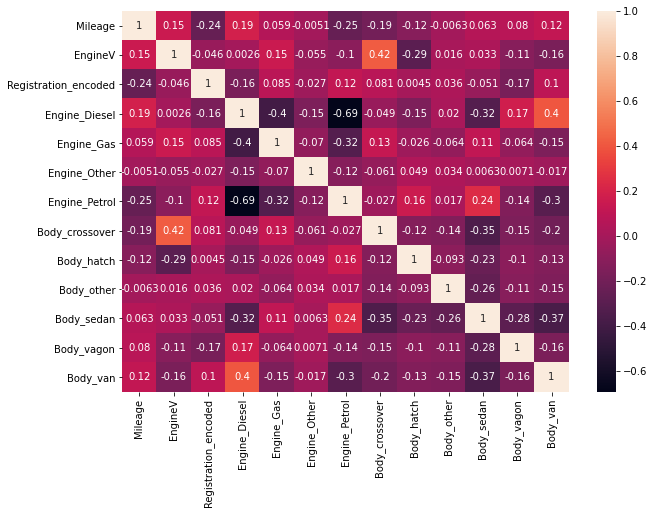

In [813]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(),annot=True)

In [814]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   # vif
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Engine_Diesel,inf
4,Engine_Gas,inf
5,Engine_Other,inf
6,Engine_Petrol,inf
7,Body_crossover,inf
8,Body_hatch,inf
9,Body_other,inf
10,Body_sedan,inf
11,Body_vagon,inf
12,Body_van,inf


### `EngineV has multicollinearity in correlation matrix, and VIF of also high, drop EngineV`

In [815]:
X_train_sm = sm.add_constant(X[['Mileage','Body_crossover', 'Body_hatch',
                                'Body_other', 'Body_sedan','Body_vagon','Engine_Diesel',
                                'Engine_Gas', 'Engine_Other','Registration_encoded']])
lr = sm.OLS(y, X_train_sm).fit()
print('R-squared',lr.rsquared)
print('Adj-Rsquared',lr.rsquared_adj)
print(f'parameters:\n{lr.params}')

R-squared 0.467490879443033
Adj-Rsquared 0.4659283526808353
parameters:
const                    8577.990585
Mileage                   -42.163118
Body_crossover          11201.438265
Body_hatch               -672.131130
Body_other               4705.004073
Body_sedan               4038.921212
Body_vagon               1948.687599
Engine_Diesel            3086.473107
Engine_Gas              -1410.344045
Engine_Other              648.573238
Registration_encoded     7114.542718
dtype: float64


In [816]:
X.drop(['EngineV'],axis=1,inplace=True)

In [817]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   # vif
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Engine_Diesel,inf
3,Engine_Gas,inf
4,Engine_Other,inf
5,Engine_Petrol,inf
6,Body_crossover,inf
7,Body_hatch,inf
8,Body_other,inf
9,Body_sedan,inf
10,Body_vagon,inf
11,Body_van,inf


### `All VIF are less than 5, all good, we can proceed`
<br />
<br />
<br />
<br />

-----

#### 13B. Feature Selection using with Backward Selection
<br />
<br />
<br />


## `Feature Selection ( Backward Elimination )`

In [818]:
X = one_hot_1[['Body_crossover', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon','Engine_Diesel', 'Engine_Gas', 'Engine_Other','Registration_encoded','Mileage','EngineV','Year']]
y = one_hot_1['Price']

In [819]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   # vif
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Year,41.96
10,EngineV,18.53
8,Registration_encoded,11.05
9,Mileage,5.51
3,Body_sedan,4.43
5,Engine_Diesel,3.24
0,Body_crossover,2.73
4,Body_vagon,1.73
1,Body_hatch,1.72
2,Body_other,1.69


In [820]:
X_train_sm  = sm.add_constant(X)
ols_model = sm.OLS(y,X_train_sm)
ols_model = ols_model.fit()
ols_model.pvalues

const                   3.274968e-205
Body_crossover           1.160979e-67
Body_hatch               4.452315e-09
Body_other               5.815175e-24
Body_sedan               4.032670e-34
Body_vagon               1.655626e-11
Engine_Diesel            1.756497e-05
Engine_Gas               5.043617e-10
Engine_Other             7.630830e-01
Registration_encoded     1.434212e-67
Mileage                  6.674901e-40
EngineV                 7.618944e-134
Year                    1.155150e-205
dtype: float64

### Drop `Year`, highest VIF

In [821]:
X.drop(['Year'],axis=1,inplace=True)

In [822]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   # vif
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,EngineV,14.26
8,Registration_encoded,6.12
9,Mileage,5.09
3,Body_sedan,3.54
5,Engine_Diesel,2.79
0,Body_crossover,2.62
2,Body_other,1.56
6,Engine_Gas,1.53
4,Body_vagon,1.47
1,Body_hatch,1.33


In [823]:
import statsmodels.api as sm
X_train_sm  = sm.add_constant(X)
ols_model = sm.OLS(y,X_train_sm)
ols_model = ols_model.fit()
ols_model.pvalues

const                    3.129261e-02
Body_crossover           1.455415e-53
Body_hatch               2.839810e-01
Body_other               4.674818e-13
Body_sedan               7.926871e-14
Body_vagon               2.236097e-05
Engine_Diesel            2.522064e-21
Engine_Gas               3.240775e-09
Engine_Other             2.678887e-01
Registration_encoded     7.213765e-80
Mileage                 2.239960e-251
EngineV                  1.125378e-91
dtype: float64

### Drop `EngineV`, highest VIF

In [824]:
X.drop(['EngineV'],axis=1,inplace=True)

In [825]:
from statsmodels.stats.outliers_influence import variance_inflation_factor   # vif
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Registration_encoded,4.91
9,Mileage,4.17
3,Body_sedan,2.67
5,Engine_Diesel,2.56
0,Body_crossover,1.63
6,Engine_Gas,1.51
2,Body_other,1.38
4,Body_vagon,1.38
1,Body_hatch,1.30
7,Engine_Other,1.07


In [826]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X)
ols_model = sm.OLS(y,X_train_sm)
ols_model = ols_model.fit()
ols_model.pvalues

const                    2.141518e-38
Body_crossover          8.478815e-135
Body_hatch               2.144401e-01
Body_other               1.785946e-22
Body_sedan               5.736936e-26
Body_vagon               2.151554e-05
Engine_Diesel            3.078615e-24
Engine_Gas               8.872874e-05
Engine_Other             3.793780e-01
Registration_encoded     4.623011e-67
Mileage                 4.032490e-188
dtype: float64

### `All VIF are less than 5, all good, we can proceed`

#### 14. Explain about Assumption of errors and predictors


#### 15A. Split The Dataset into Train and Test (80:20) using Sklearn

In [827]:
###CODEHERE
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

#### 15B. Perform the Linear Regression Model fit using Sklearn.

In [828]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred))
Rsqr_test = round(r2_score(y_test,y_pred)*100,2)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

RMSE is:  6458.898310159316
RSquared is: 47.08%


#### 15C. Explain about Lasso Regression and Perform the Lasso Regression

In [829]:
from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=1)
lasso_r.fit(X_train,y_train)
y_pred = lasso_r.predict(X_test)

rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred))
Rsqr_test = round(r2_score(y_test,y_pred)*100,2)

print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  6458.642105135082
RSquared is: 47.09%


#### 15D. Explain about Ridge Regression and Perform the Ridge Regression

In [830]:
from sklearn.linear_model import Ridge
lm_r = Ridge(alpha=3)
lm_r.fit(X_train,y_train)
y_pred = lm_r.predict(X_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,y_pred))
Rsqr_test = round(r2_score(y_test,y_pred)*100,2)

print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: '+str(Rsqr_test)+'%')

Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  6458.916176903057
RSquared is: 47.08%


#### 16. Perform Residual Analysis Give The Interpretations.

In [831]:
###CODEHERE

### Give the Conclusions about the Model fits for What you Observe.

In [832]:
### Interpretations